# Practical: Crystal Structure
```{admonition} Pymatgen
:class: info
Make sure you have `pymatgen` installed. Please refer to the [installation instructions](../orientation/setup.md#creating-python-virtual-environments).
```

`pymatgen` (Python Materials Genome) is a Python library for materials analysis. It provides classes to work with crystal structures, molecules, and other materials-related objects. It also provides tools to perform various analyses on these objects.

In this practical, we will learn how to use the `pymatgen` library to work with crystal structures. We will learn how to create a crystal structure, visualize it, and perform some basic operations on it. 



In short words, crystal structure = lattice + basis. We will start from the lattice.

## Lattice

Crystal structure is a fundamental concept in materials science. It describes the arrangement of atoms in a solid material. The crystal structure of a material can be described by the lattice parameters and the atomic positions within the unit cell.

You can use `pymatgen` to create a `Lattice` object. The lattice is defined by three lattice vectors `a`, `b`, and `c`. You can supply lattice vectors as a tuple `(a, b, c)` or as a $3\times3$ matrix.

$$
\begin{pmatrix}
a_x & a_y & a_z \\
b_x & b_y & b_z \\
c_x & c_y & c_z \\
\end{pmatrix}
$$


In [3]:
from pymatgen.core import Lattice

# Create a Lattice object
lattice = Lattice(matrix = [[5.43, 0, 0],  # ax, ay, az
                            [0, 5.43, 0],  # bx, by, bz
                            [0, 0, 5.43]]) # cx, cy, cz

# Another way to create this Lattice object
lattice = Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90)

print(lattice)


print(lattice.get_cartesian_coords([0.5, 0.5, 0.5]))



5.430000 0.000000 0.000000
-0.000000 5.430000 0.000000
0.000000 0.000000 5.430000
[2.715 2.715 2.715]


### Reciprocal Lattice
You can also create a reciprocal lattice object from the lattice object. The reciprocal lattice is defined by the reciprocal lattice vectors `a*`, `b*`, and `c*`. The reciprocal lattice vectors are given by the formula:
$$
\mathbf{a}^* = 2\pi \frac{\mathbf{b} \times \mathbf{c}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}, \quad
\mathbf{b}^* = 2\pi \frac{\mathbf{c} \times \mathbf{a}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}, \quad
\mathbf{c}^* = 2\pi \frac{\mathbf{a} \times \mathbf{b}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}
$$

### Brillouin Zone
The Brillouin zone is a primitive cell in reciprocal space. It is used to describe the behavior of electrons in a solid material. You can create a Brillouin zone object from the lattice object using `lattice.get_brillouin_zone()`. The Brillouin zone object contains the vertices of the Brillouin zone.

In [183]:
def draw_brillouin_zone(facets):
    import plotly.graph_objects as go

    fig = go.Figure()

    # Plot each facet of the Brillouin zone
    for facet in facets:
        x, y, z = zip(*[point for point in facet])
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color='lightgrey', name='Facet'))
        for i in range(len(facet)):
            fig.add_trace(go.Scatter3d(x=[x[i], x[(i+1) % len(facet)]],
                                       y=[y[i], y[(i+1) % len(facet)]],
                                       z=[z[i], z[(i+1) % len(facet)]],
                                       mode='lines',
                                       line=dict(color='black', width=2),
                                       showlegend=False))

    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ), 
        title="Brillouin Zone Visualization",
        margin=dict(l=0, r=0, b=0, t=40),
        width=550,
        height=550,
    )

    fig.show()

lattice = Lattice.from_parameters(a=3, b=3, c=3, alpha=60, beta=60, gamma=60)

reciprocal_lattice = lattice.reciprocal_lattice
brillouin_zone = reciprocal_lattice.get_brillouin_zone()

print(f"reciprocal_lattice = \n{reciprocal_lattice:.3f}")
print(f"brillouin_zone = {brillouin_zone}")

draw_brillouin_zone(brillouin_zone)



reciprocal_lattice = 
2.418 -0.855 0.000
0.000 2.565 0.000
-1.209 -0.855 2.094
brillouin_zone = [[array([-0.8660254 , -0.61237244, -1.5       ]), array([ 0.8660254 , -1.22474487, -1.5       ]), array([ 0.8660254 ,  0.61237244, -1.5       ]), array([-0.8660254 ,  1.22474487, -1.5       ])], [array([ 0.8660254 ,  0.61237244, -1.5       ]), array([1.73205081e+00, 1.22474487e+00, 9.79779540e-16]), array([ 1.73205081e+00, -6.12372436e-01,  3.74264793e-16]), array([ 0.8660254 , -1.22474487, -1.5       ])], [array([ 0.8660254 ,  0.61237244, -1.5       ]), array([1.73205081e+00, 1.22474487e+00, 9.79779540e-16]), array([-1.13023227e-16,  1.83711731e+00,  4.33485989e-16]), array([-0.8660254 ,  1.22474487, -1.5       ])], [array([-1.73205081e+00,  6.12372436e-01, -7.71917805e-16]), array([-0.8660254 ,  1.22474487, -1.5       ]), array([-0.8660254 , -0.61237244, -1.5       ]), array([-1.73205081e+00, -1.22474487e+00, -6.59932732e-16])], [array([-0.8660254 , -0.61237244, -1.5       ]), array([ 0.86

## Basis
Basis is the set of atomic positions within the unit cell. You can create a `Structure` object by providing the lattice and the basis. The basis is a list of atomic positions. Each atomic position is a tuple `(specie, coords)` where `species` is the atomic symbol and `coords` is the coordiantes (by default fractional) of the atom in the unit cell.

In [139]:
from pymatgen.core import Structure

lattice_si = Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90) 
structure_si = Structure.from_spacegroup(sg=227, species=["Si"], lattice=lattice_si, coords=[[0, 0, 0]])

print(structure_si)

Full Formula (Si8)
Reduced Formula: Si
abc   :   5.430000   5.430000   5.430000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0.5   0     0.5
  1  Si    0.25  0.25  0.25
  2  Si    0     0     0
  3  Si    0.25  0.75  0.75
  4  Si    0.75  0.25  0.75
  5  Si    0     0.5   0.5
  6  Si    0.5   0.5   0
  7  Si    0.75  0.75  0.25


## Structure Visualization
You can export the crystal structure to a `.cif` file and visualize it using visualization tools like VESTA, Jmol, or VESTA.

In this course, we will use VESTA to visualize the crystal structures. You can download VESTA from [here](https://jp-minerals.org/vesta/en/).

In [7]:
structure_si.to(filename="Si.cif")

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/io/cif.py:1724: FutureWarning: We strongly discourage using implicit binary/text `mode`, and this would not be allowed after 2025-06-01. I.e. you should pass t/b in `mode`.
  with zopen(filename, mode=mode) as file:


"# generated using pymatgen\ndata_Si\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.43000000\n_cell_length_b   5.43000000\n_cell_length_c   5.43000000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Si\n_chemical_formula_sum   Si8\n_cell_volume   160.10300700\n_cell_formula_units_Z   8\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si0  1  0.50000000  0.00000000  0.50000000  1\n  Si  Si1  1  0.25000000  0.25000000  0.25000000  1\n  Si  Si2  1  0.00000000  0.00000000  0.00000000  1\n  Si  Si3  1  0.25000000  0.75000000  0.75000000  1\n  Si  Si4  1  0.75000000  0.25000000  0.75000000  1\n  Si  Si5  1  0.00000000  0.50000000  0.50000000  1\n  Si  Si6  1

## Primitive Cell vs Convensional Cell
The primitive cell is the smallest unit cell that can be used to describe the crystal structure. The conventional cell is a larger unit cell that is used to describe the crystal structure in a more convenient way. You can convert a structure to a primitive cell using `structure.get_primitive_structure()`.

In [50]:
primitive_structure = structure_si.get_primitive_structure()

print(f"conventional_structure = \n{structure_si}")
print(f"primitive_structure = \n{primitive_structure}\n")

conventional_structure = 
Full Formula (Si8)
Reduced Formula: Si
abc   :   5.430000   5.430000   5.430000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0.5   0     0.5
  1  Si    0.25  0.25  0.25
  2  Si    0     0     0
  3  Si    0.25  0.75  0.75
  4  Si    0.75  0.25  0.75
  5  Si    0     0.5   0.5
  6  Si    0.5   0.5   0
  7  Si    0.75  0.75  0.25
primitive_structure = 
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.839590   3.839590   3.839590
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.75  0.75  0.75



## Symmetry
### Symmetry Analyzer
`pymatgen` provides a `SymmetryAnalyzer` class to analyze the symmetry of a crystal structure. You can use `SymmetryAnalyzer` to get the symmetry operations of a crystal structure.

In [ ]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

structure = Structure.from_id(id_ = "mp-2998",api_key="api-key")
sga = SpacegroupAnalyzer(structure, symprec = 0.01, angle_tolerance=3)

conventional_structure = sga.get_conventional_standard_structure()
primitive_structure = sga.get_primitive_standard_structure()

print(f"conventional_structure = \n{conventional_structure}\n")
print(f"primitive_structure = \n{primitive_structure}\n")
symmtrized_structure = sga.get_symmetrized_structure()

sga = SpacegroupAnalyzer(primitive_structure)
print(f"Crystal system: {sga.get_crystal_system()}\n")
print(f"Wyckoff sites: {sga.get_symmetry_dataset()['wyckoffs']}")
print(f"multiplicity: {sga.get_symmetry_dataset()['equivalent_atoms']}")


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.



Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

conventional_structure = 
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.007682   4.007682   4.007682
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0.5  0.5  0.5
  1  Ti    0    0    0
  2  O     0.5  0    0
  3  O     0    0.5  0
  4  O     0    0    0.5

primitive_structure = 
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.007682   4.007682   4.007682
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0.5  0.5  0.5
  1  Ti    0    0    0
  2  O     0.5  0    0
  3  O     0    0.5  0
  4  O     0    0    0.5

Crystal system: cubic

Wyckoff sites: ['b', 'a', 'd', 'd', 'd']
multiplicity: [0 1 2 2 2]


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning:

dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning:

dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead



### Symmetry Operations
Symmetry operations are operations that leave the crystal structure invariant. 

In [46]:
from pymatgen.symmetry.groups import PointGroup

point_group = PointGroup("m-3m")

orbit = point_group.get_orbit([0.5, 0.5, 0.5])

print(f"orbit = {orbit}")
for i,sym_op in enumerate(point_group.symmetry_ops):
    print(f"Symmetry operation {i+1}:")
    print(sym_op)
    print()


orbit = [array([-0.5, -0.5, -0.5]), array([-0.5, -0.5,  0.5]), array([ 0.5,  0.5, -0.5]), array([-0.5,  0.5,  0.5]), array([ 0.5, -0.5, -0.5]), array([-0.5,  0.5, -0.5]), array([0.5, 0.5, 0.5]), array([ 0.5, -0.5,  0.5])]
Symmetry operation 1:
Rot:
[[ 0.  0. -1.]
 [ 0. -1.  0.]
 [-1.  0.  0.]]
tau
[0. 0. 0.]

Symmetry operation 2:
Rot:
[[ 0.  0. -1.]
 [-1.  0.  0.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.]

Symmetry operation 3:
Rot:
[[ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0. -1.  0.]]
tau
[0. 0. 0.]

Symmetry operation 4:
Rot:
[[ 0.  0. -1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
tau
[0. 0. 0.]

Symmetry operation 5:
Rot:
[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0. -1.  0.]]
tau
[0. 0. 0.]

Symmetry operation 6:
Rot:
[[-1.  0.  0.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]]
tau
[0. 0. 0.]

Symmetry operation 7:
Rot:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Symmetry operation 8:
Rot:
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Symmetry operation 9:
Rot:
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.

In [17]:
from pymatgen.symmetry.groups import SpaceGroup

sg = SpaceGroup(int_symbol = 'P-1')
crystal_system = sg.crystal_system
symm_ops = sg.symmetry_ops
print(f"crystal system: {crystal_system}")

for i, symm_op in enumerate(symm_ops):
    print(f"Symmetry operation {i+1}:")
    print(symm_op)
    print()


crystal system: triclinic
Symmetry operation 1:
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Symmetry operation 2:
Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]



### Subgroup and Supergroup

When $H$ is a subgroup of $G$, it means that all the symmetry operations of $H$ are also symmetry operations of G (also written as $H < G$). When $H$ is a supergroup of $G$, it means that all the symmetry operations of G are also symmetry operations of $H$ (also written as $H > G$).

Supergroup and subgroup relationship is very important for phase transitions in materials. When a material undergoes a phase transition, the symmetry of the material changes. The lower symmetry group is a subgroup of the higher symmetry group. For example, when a material undergoes a phase transition from cubic to tetragonal, the cubic group is a supergroup of the tetragonal group. An example is $BaTiO_3$, which undergoes a phase transition from cubic (Pm-3m) to tetragonal (P4mm) at 393 K.

You can use `is_subgroup()` and `is_supergroup()` methods to check if a group is a subgroup or supergroup of another group.

In [45]:
H = SpaceGroup(int_symbol = 'Fm-3m')
G = SpaceGroup(int_symbol = 'Pnma')

print(f"Are H ({G.symbol}) and G ({H.symbol}) equivalent? {H==G}")
print(f"Is G ({G.symbol}) a subgroup (<) of H ({H.symbol})? {G.is_subgroup(H)}")
print(f"Is H ({H.symbol}) a supergroup (>) of G ({G.symbol})? {H.is_supergroup(G)}")

Are H (Pnma) and G (Fm-3m) equivalent? False
Is G (Pnma) a subgroup (<) of H (Fm-3m)? True
Is H (Fm-3m) a supergroup (>) of G (Pnma)? True


## Calculate Diffraction Pattern
You can generate an X-ray diffraction pattern from a crystal structure using `XRDCalculator`. The X-ray diffraction pattern is a plot of the intensity of X-ray diffraction peaks as a function of the diffraction angle. The diffraction angle is related to the spacing between the atomic planes in the crystal structure. You can also calculate electron diffraction patterns using `TEMCalculator`, and neutron diffraction patterns using `NDCalculator`.


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/core/structure.py:3087: EncodingWarning:

We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686



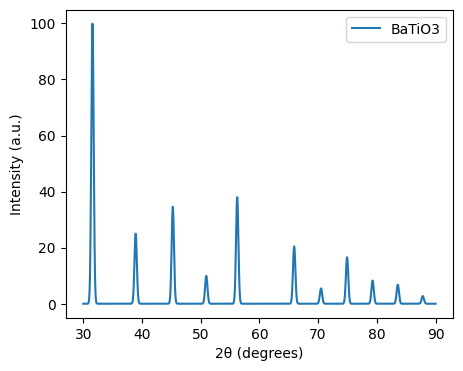

In [ ]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import matplotlib.pyplot as plt

structure = Structure.from_file("BaTiO3.cif")

xrd = XRDCalculator(wavelength='CuKa')
range_2theta = (30, 90)
sigma = 0.2

# Apply smearing to the XRD pattern
pattern = xrd.get_pattern(structure=structure, scaled=True, two_theta_range=range_2theta)

# Apply Gaussian smearing
x_new = np.linspace(range_2theta[0], range_2theta[1], 1000)
y_new = np.zeros_like(x_new)

for x, y in zip(pattern.x, pattern.y):
    y_new += y * np.exp(-(x_new - x)**2 / (2 * sigma**2))


# Plot the smeared XRD pattern
plt.figure(figsize=(5, 4))
plt.plot(x_new, y_new, label=f'{structure.composition.reduced_formula}')
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [138]:
from pymatgen.analysis.diffraction.tem import TEMCalculator 
from mpl_toolkits.axes_grid1 import make_axes_locatable

structure = Structure.from_file("BaTiO3.cif")
tem = TEMCalculator(voltage = 200, beam_direction=(0, 0, 1))

fig = tem.get_plot_2d(structure)

fig.show()

